In [62]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
concrete_compressive_strength = fetch_ucirepo(id=165) 
  
# data (as pandas dataframes) 
X = concrete_compressive_strength.data.features 
y = concrete_compressive_strength.data.targets 
  
# metadata 
print(concrete_compressive_strength.metadata) 
  
# variable information 
print(concrete_compressive_strength.variables) 


{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'published_in': 'Cement and Concrete Res

In [63]:
X.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000


In [64]:
full_data = X.copy()
full_data['target'] = y

full_data.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,target
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
target,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [65]:
# normalize data 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# y_scaler = StandardScaler()
# y_normalized = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values, test_size=0.3, random_state=42)

In [66]:
y_train.max()

82.6

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 8), (309, 8), (721, 1), (309, 1))

In [68]:
import torch 

if torch.backends.mps.is_available():
    device = "mps"
    
elif torch.cuda.is_available():
    device = "cuda"

else:
    device = "cpu"    

In [69]:
device

'mps'

In [70]:
# 3-headed output

# modification to MyModel
#    return output1, output2, output3 -> return self.net(x)  # torch.nn.Linear(30,3)
class QRegressor(torch.nn.Module):
    def __init__(self, in_size=1, out_size=1):
        super(QRegressor,self).__init__()
        self.in_size = in_size
        self.out_size = out_size

        hidden_layer = 16

        self.net = torch.nn.Sequential(
            torch.nn.Linear(self.in_size, hidden_layer),
            torch.nn.BatchNorm1d(hidden_layer),
            torch.nn.LeakyReLU(),
            
            # torch.nn.Dropout(0.2),

            # torch.nn.Linear(hidden_layer, hidden_layer),
            # torch.nn.BatchNorm1d(hidden_layer),
            # torch.nn.LeakyReLU(),

            torch.nn.Linear(hidden_layer, 3* self.out_size)
            )

    def forward(self,x):
        return self.net(x)

def PinballLoss(input, target):
    ## Other Losses
    # Normal loss
    #loss = (((input[0] - target)/torch.exp(input[1]))**2+input[1]).mean()
    # Laplace loss
    #loss = (torch.abs((input[0] - target)/torch.exp(input[1]))+input[1]).mean()
    # t-distribution loss
    #nu = 3
    #loss = ((nu + 1)/2*torch.log(1+((input[0] - target)/torch.exp(input[1]))**2/nu)+input[1]).mean()
    # print(input, target)

    ## Quantile Loss
    q1 = 0.05
    q2 = 0.5
    q3 = 0.95


    ## Keras quantile loss, https://www.evergreeninnovations.co/blog-quantile-loss-function-for-machine-learning/
    #e = y_p-y
    #return tf.keras.backend.mean(tf.keras.backend.maximum(q*e, (q-1)*e))

    ## Quantile Loss
    ## for q1, q2, q3
    #print(input.shape)
    #print(input[:,0:1].shape)
    #print(target.shape)
    e1 = input[:,0:1] - target # !!! if input[:,0]  -> shape = (1000,)
    e2 = input[:,1:2] - target
    e3 = input[:,2:3] - target
    eq1 = torch.max(q1*e1, (q1-1)*e1)
    eq2 = torch.max(q2*e2, (q2-1)*e2)
    eq3 = torch.max(q3*e3, (q3-1)*e3)

    #eq1 = torch.max(0.05*e1, (0.05-1)*e1)
    #eq2 = torch.max(0.5*e2, (0.5-1)*e2)
    #eq3 = torch.max(0.95*e3, (0.95-1)*e3)

    loss = (eq1 + eq2 + eq3).mean()

    return loss

In [71]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

train_x_tr = X_train.to(device)
train_y_scalar = y_train.to(device)

model = QRegressor(in_size=8, out_size=1).to(device)

criterion = PinballLoss
# criterion = torch.nn.L1Loss()

optimizer = torch.optim.Adam(params=model.parameters(), lr=0.1, weight_decay=0.0001)

In [72]:
train_x_tr.shape

torch.Size([721, 8])

In [73]:
model.train()

losses = []

for step in range(3000):
    #yq1, yq2, yq3 = model(x)
    #loss = criterion(input=(yq1, yq2, yq3), target=y)
    yqs = model(train_x_tr)
    optimizer.zero_grad()
    #print(yqs.shape, train_y_tr.shape)
    loss = criterion(input=yqs, target =train_y_scalar)
    losses.append(loss.item()) 
    loss.backward()
    optimizer.step()

    if (step+1) % 1000 == 0:
        """
        Show your intermediate results
        """
        print('epoch {} loss={:.4}'.format(step+1, loss.data.item()))
        pass

epoch 1000 loss=3.042
epoch 2000 loss=2.653
epoch 3000 loss=2.478


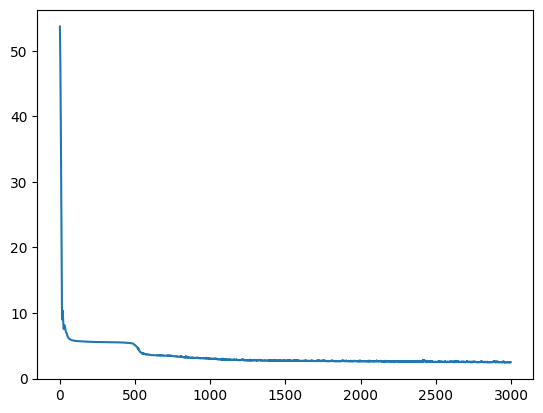

In [74]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

<BarContainer object of 721 artists>

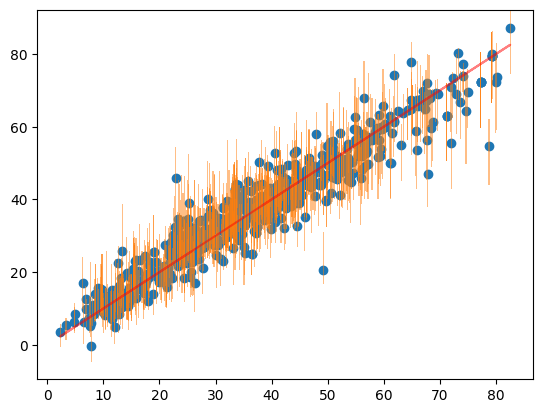

In [75]:
import matplotlib.pyplot as plt 
import numpy as np

train_pred = model(train_x_tr)
train_pred = train_pred.detach().cpu().numpy()


plt.plot(y_train,y_train, color='red',alpha=0.5)
plt.scatter(y_train,train_pred[:,1])

plt.bar(y_train.flatten(),train_pred[:,2] - train_pred[:,0], width=0.2,bottom=train_pred[:,0], alpha=0.5)


<BarContainer object of 309 artists>

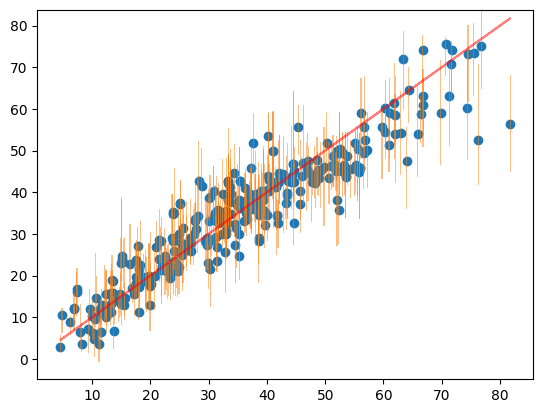

In [81]:
import matplotlib.pyplot as plt 
import numpy as np


test_x_tr = torch.tensor(X_test, dtype=torch.float32).to(device)

test_pred = model(test_x_tr)
test_pred = test_pred.detach().cpu().numpy()


plt.plot(y_test,y_test, color='red',alpha=0.5)
plt.scatter(y_test,test_pred[:,1])

plt.bar(y_test.flatten(),test_pred[:,2] - test_pred[:,0], width=0.2,bottom=test_pred[:,0], alpha=0.5)


In [91]:

y_pred = model(train_x_tr).detach().cpu().numpy()

indices_sorted = np.argsort(y_train.flatten())
y_train_sorted = y_train[indices_sorted]
y_pred_sorted = y_pred[indices_sorted]


In [92]:
y_train.shape

torch.Size([721, 1])

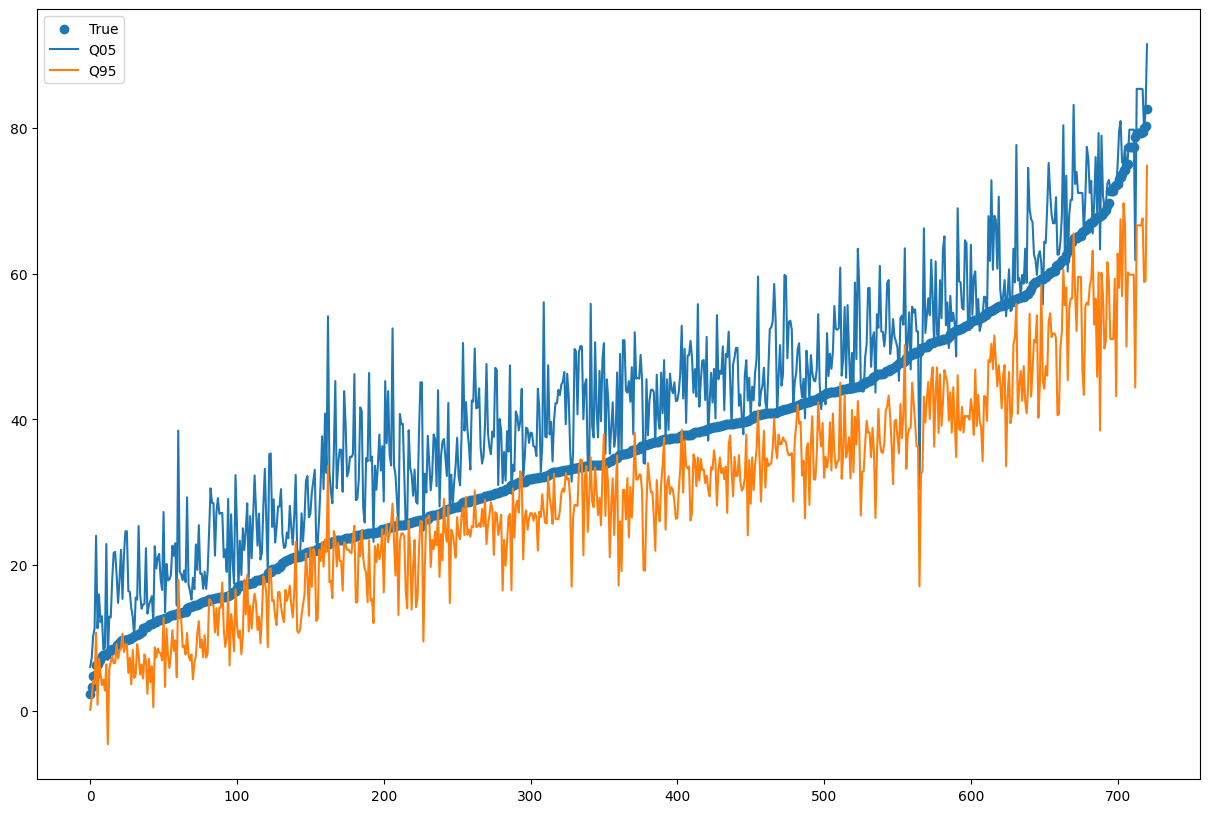

In [98]:
plt.figure(figsize=(15,10))
plt.scatter(np.arange(len(y_train_sorted)) , y_train_sorted, label='True')
plt.plot(y_pred_sorted[:,0],label='Q05')
# plt.scatter(np.arange(len(y_train_sorted)),y_pred_sorted[:,1],marker="x", label='Q50',color="green")
plt.plot(y_pred_sorted[:,2], label='Q95')
plt.legend()
plt.show()


In [114]:
picp = np.mean((y_train.flatten().cpu().detach().numpy() >= y_pred[:,2]) & (y_train.flatten().cpu().detach().numpy() <= y_pred[:,0]))

In [115]:
ace = picp - 0.9

In [117]:
picp, ace

(0.8446601941747572, -0.05533980582524278)